In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
car_data=pd.read_csv("car data.csv")

In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_data.shape

(301, 9)

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
X=car_data.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [20]:
X.shape

(301, 7)

In [21]:
Y.shape

(301,)

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


In [25]:
lin_reg_model=LinearRegression()

In [27]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [28]:
train_data_prediction=lin_reg_model.predict(X_train)

In [30]:
error_score=metrics.r2_score(Y_train,train_data_prediction)
print("R squarred error is",error_score)

R squarred error is 0.8799451660493715


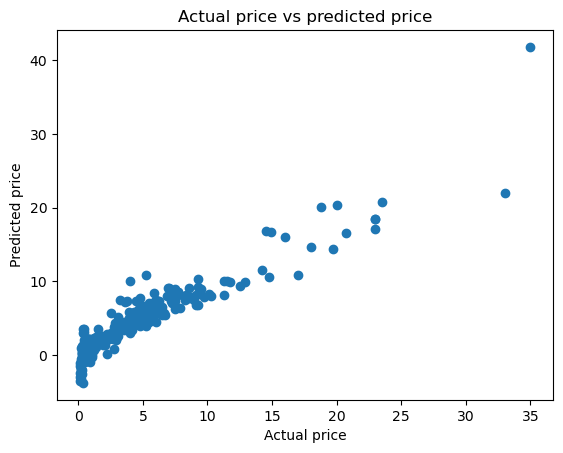

In [31]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [32]:
test_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squarred error is ",error_score)

R squarred error is  0.836576671502587


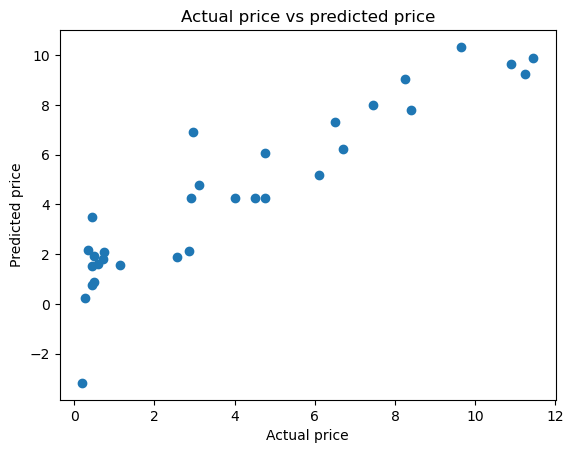

In [34]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [35]:
las_reg_model=Lasso()

In [36]:
las_reg_model.fit(X_train,Y_train)

Lasso()

In [37]:
train_data_prediction=las_reg_model.predict(X_train)

In [38]:
error_score=metrics.r2_score(Y_train,train_data_prediction)
print("R squarred error is",error_score)

R squarred error is 0.8427856123435794


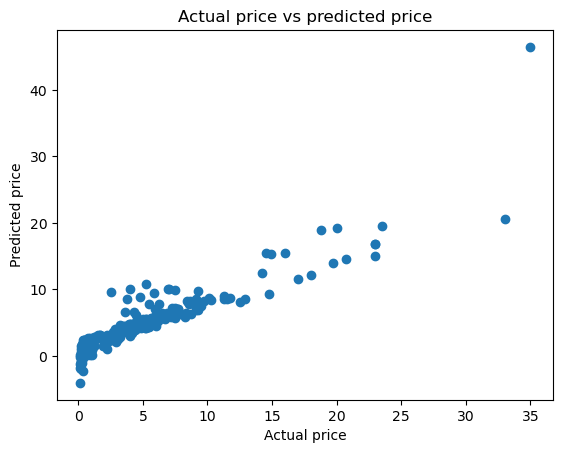

In [39]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [41]:
test_data_prediction=las_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squarred error is ",error_score)

R squarred error is  0.8709167941173195


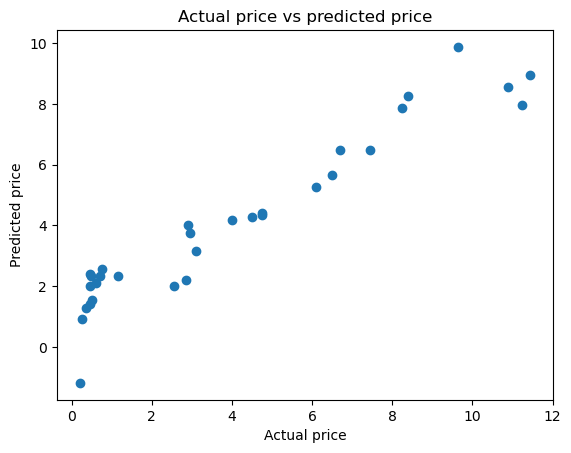

In [42]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted price")
plt.show()

In [43]:
import joblib as jb

In [44]:
jb.dump(lin_reg_model,'model1car.joblib')

['model1car.joblib']

In [45]:
jb.dump(las_reg_model,"model2car.joblib")

['model2car.joblib']